In [1]:
from  sp_data_generator.supply_planning_data_generator import SupplyPlanningDataGenerator as Sp


ModuleNotFoundError: No module named 'sp_data_generator'

In [2]:
import pandas as pd

In [2]:
generator = Sp(seed=42)

dataset = generator.generate_full_dataset()

generator.export_to_excel(dataset)

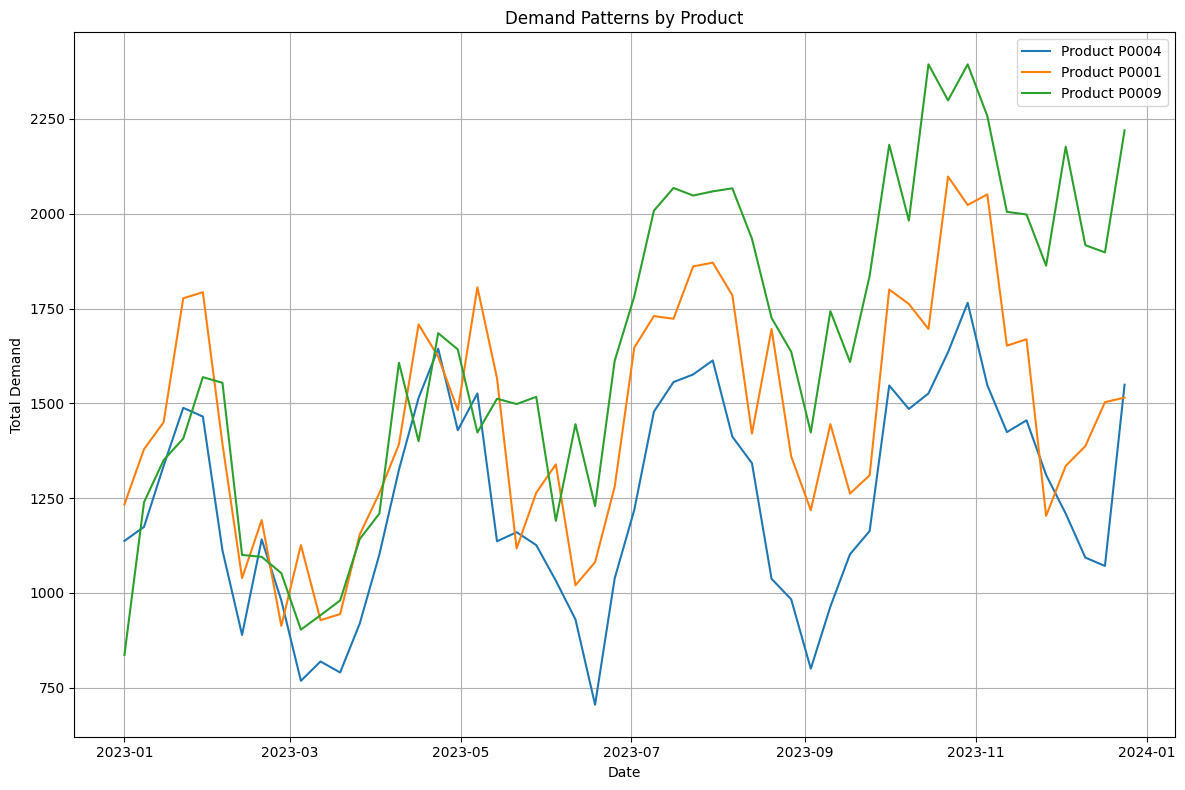

In [3]:
generator.visualize_demand_patterns(dataset['demand'])

In [9]:
# load the Excel data
df_products = pd.read_excel("supply_planning_data.xlsx", sheet_name="products")
df_facilities = pd.read_excel("supply_planning_data.xlsx", sheet_name="facilities")
df_transportation= pd.read_excel("supply_planning_data.xlsx", sheet_name="transportation")
df_demand = pd.read_excel("supply_planning_data.xlsx", sheet_name="demand")
df_billofmaterials= pd.read_excel("supply_planning_data.xlsx", sheet_name="bill_of_materials")
df_components = pd.read_excel("supply_planning_data.xlsx", sheet_name="components")
df_workforce = pd.read_excel("supply_planning_data.xlsx", sheet_name="workforce")    

In [21]:
df_demand.info

<bound method DataFrame.info of            date product_id facility_id  demand
0    2023-01-01      P0001        F001     459
1    2023-01-08      P0001        F001     662
2    2023-01-15      P0001        F001     561
3    2023-01-22      P0001        F001     864
4    2023-01-29      P0001        F001     672
...         ...        ...         ...     ...
3115 2023-11-26      P0020        F003     189
3116 2023-12-03      P0020        F003     198
3117 2023-12-10      P0020        F003     156
3118 2023-12-17      P0020        F003     176
3119 2023-12-24      P0020        F003     188

[3120 rows x 4 columns]>

In [17]:
df_demand.groupby([ "facility_id"])["demand"].sum().reset_index()

,facility_id,demand
0,F001,291136
1,F002,288712
2,F003,320204


['F001', 'F002', 'F003', 'F004', 'F005']


In [ ]:

# get a list of all existing facilities
existing_facilities = df_facilities["facility_id"].tolist()


pivoted = (df_demand.pivot_table(
    index="product_id",      # rows
    columns="facility_id",   # columns
    values="demand",         # what to aggregate
    aggfunc="sum",           # how to aggregate
    fill_value=0             # optional: replace NaN with 0
)).reindex(columns=existing_facilities, fill_value=0)

print(pivoted)


facility_id   F001   F002   F003  F004  F005
product_id                                  
P0001        33746  20670  21868     0     0
P0002        29467  43180  43933     0     0
P0003         5993  12496   5995     0     0
P0004        11108  28889  24549     0     0
P0005         6204   2738   4362     0     0
P0006         8981   6689   2929     0     0
P0007         5040   8265   8838     0     0
P0008         6914   7385  10897     0     0
P0009        27556  29495  28611     0     0
P0010        13499   7334   6093     0     0
P0011         4628   3753   5957     0     0
P0012        30290  28230  61403     0     0
P0013         8768  10683  10712     0     0
P0014         2637   8553   7290     0     0
P0015         7695   3161   6272     0     0
P0016         6254   8551   8786     0     0
P0017        37352  24597  12737     0     0
P0018        21338   9605  21082     0     0
P0019        17545  20331  20918     0     0
P0020         6121   4107   6972     0     0
